In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("mattersim_test_results.csv")

avg_df = df.groupby("num_atoms", as_index=False).mean()

print(avg_df)

    num_atoms  avg_partition_size  partition_energy  benchmark_energy  \
0         426              426.00      -2207.775146      -2207.774740   
1        1704             1703.90      -8831.095378      -8831.086589   
2        3408             3407.95     -17662.154297     -17662.180339   
3        7668             6839.90     -39739.678385     -39739.713542   
4       11502            10180.60     -59609.673177     -59609.656250   
5       20448            13624.10    -105976.268229    -105975.942708   
6       27264            17424.05    -141302.718750    -141302.666667   
7       42600            21084.85    -220784.989583    -220784.578125   
8       53250            24957.35    -275979.812500    -275979.864583   
9       76680            29250.80    -397393.614583    -397393.468750   
10      92016            33958.85    -476867.864583    -476866.864583   
11     125244            39142.10    -649068.437500    -649071.729167   

    energy_error_abs  energy_error_pct  avg_partit

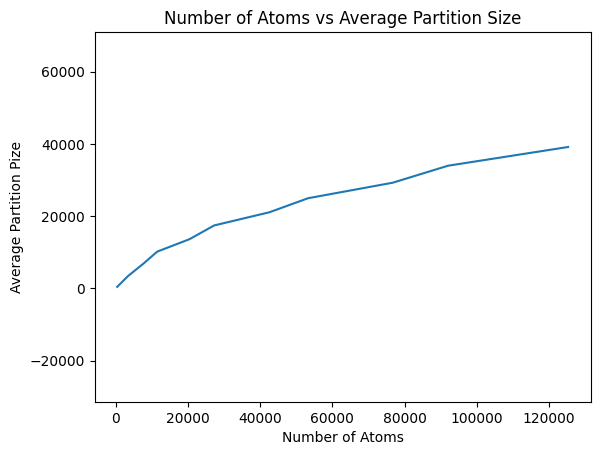

In [45]:
plt.plot(avg_df["num_atoms"], avg_df["avg_partition_size"])
plt.axis("equal") 
plt.xlabel("Number of Atoms")
plt.ylabel("Average Partition Pize")
plt.title("Number of Atoms vs Average Partition Size")
plt.show()

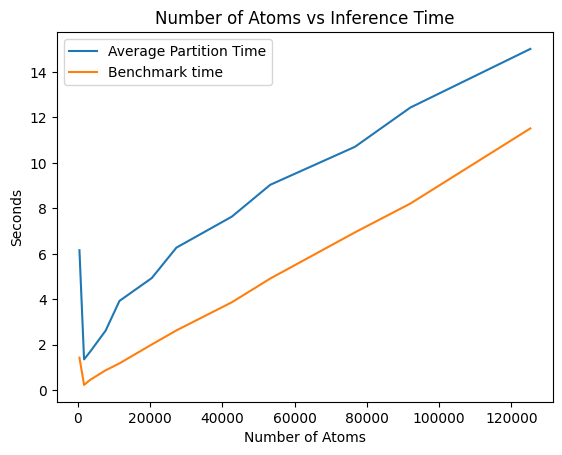

In [47]:
plt.plot(avg_df["num_atoms"], [x * 20 for x in avg_df["avg_partition_time"]], label="Average Partition Time")
plt.plot(avg_df["num_atoms"], avg_df["benchmark_time"], label="Benchmark time")
plt.xlabel("Number of Atoms")
plt.ylabel("Seconds")
plt.title("Number of Atoms vs Inference Time")
plt.legend()
plt.show()

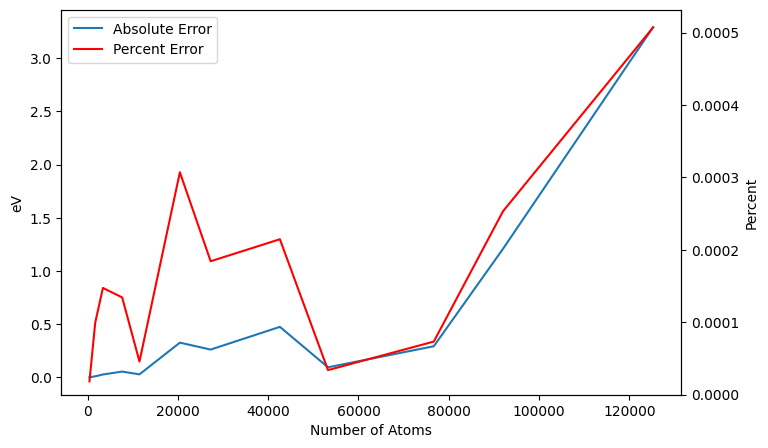

In [42]:
fig, ax1 = plt.subplots(figsize=(8,5))

line1, = ax1.plot(avg_df["num_atoms"], avg_df["energy_error_abs"], label="Absolute Error")
ax1.set_ylabel("eV")
ax1.set_xlabel("Number of Atoms")

ax2 = ax1.twinx()
line2, = ax2.plot(avg_df["num_atoms"], avg_df["energy_error_pct"], label="Percent Error", color='red')
ax2.set_ylabel("Percent")
ax2.set_ylim(0)

lines = [line1, line2]  # Collect line objects
labels = [line.get_label() for line in lines]  # Get labels

# Place the legend
ax1.legend(lines, labels, loc="upper left")  # Adjust location as needed
plt.show()